In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import load_neugebauer, InkGamut, Neugebauer, km_mix, bucket_points, max_dist, sort_buckets

In [3]:
trichromat = Observer.trichromat()
tetrachromat = Observer.tetrachromat()

## Finegrid Search

In [4]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [5]:
paper = cmy_primaries_dict["000"]
cyan = cmy_primaries_dict["100"]
magenta = cmy_primaries_dict["010"]
yellow = cmy_primaries_dict["001"]

In [6]:
cmy_neugebauer = Neugebauer(cmy_primaries_dict)

In [7]:
cmy_gamut = InkGamut(cmy_neugebauer)

todo: figure out whitepoint shit

mean as simple verify statistic idk

In [9]:
cmy_gamut.whitepoint

In [10]:
cmy_gamut.get_point_cloud(trichromat)[0].shape

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 63423.71it/s]


(1331, 3)

In [11]:
cmy_gamut.get_point_cloud(trichromat, grid=np.array([
    [0, 0, 0],
    [0, 0.5, 0],
    [0, 0.6, 0]
]))

Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10636.44it/s]


(array([[0.84281343, 0.82806234, 0.82505136],
        [0.53777441, 0.41412912, 0.4953809 ],
        [0.4917392 , 0.36386024, 0.45414056]]),
 array([[0. , 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0.6, 0. ]]))

In [11]:
percentages = cmy_gamut.get_buckets(trichromat, stepsize=0.1)

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 65805.61it/s]

Point cloud generated.


In [12]:
percentages[0]

(0.1584569374583029, ((1.0, 0.0, 0.4), (0.0, 0.9, 0.2)))

In [13]:
percentages_fine = cmy_gamut.get_buckets(trichromat, stepsize=0.1, refined=True)
percentages_fine[0]

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 52635.92it/s]


Point cloud generated.
exploring [0.8 0.  0.2] to [1.  0.2 0.4] and [0.  0.7 0. ] to [0.2 0.9 0.2]


Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 66982.05it/s]


(0.1584569374583029, ((1.0, 0.0, 0.4), (0.0, 0.9, 0.2)))

In [14]:
pc10, perc10 = cmy_gamut.get_point_cloud(trichromat, stepsize=0.1)

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 63684.18it/s]


In [15]:
max_dist(bucket_points(pc10))

(0.1584569374583029, (1214, 101))

In [16]:
perc10[1214], perc10[101]

(array([1. , 0. , 0.4]), array([0. , 0.9, 0.2]))

In [17]:
pc_refined, perc_refined = cmy_gamut.get_refined_point_cloud(trichromat, 
                                 np.array([1, 0, 0.4]),
                                 np.array([0, 0.9, 0.2]) )

exploring [0.9 0.  0.3] to [1.  0.1 0.4] and [0.  0.8 0.1] to [0.1 0.9 0.2]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 56104.14it/s]


In [18]:
pc_refined.shape

(432, 3)

In [19]:
pc10.shape

(1331, 3)

In [20]:
max_dist(bucket_points(pc_refined))

(0.16741721520257072, (180, 234))

In [21]:
sort_buckets(bucket_points(pc_refined))[:10]

[(0.16741721520257072, (180, 234)),
 (0.1638416442910474, (193, 246)),
 (0.16359473233587876, (149, 239)),
 (0.16341496739992817, (148, 238)),
 (0.1632266717585415, (147, 237)),
 (0.1630297085806587, (146, 236)),
 (0.16290662789776916, (108, 228)),
 (0.16217779548737488, (191, 251)),
 (0.161593856796052, (190, 249)),
 (0.1612073489705659, (188, 248))]

In [22]:
perc_refined[147], perc_refined[238]

(array([0.98, 0.  , 0.36]), array([0.  , 0.86, 0.18]))

prfect!! let us c..

In [23]:
pc2, perc2 = cmy_gamut.get_point_cloud(trichromat, stepsize=0.02)

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████| 132651/132651 [00:01<00:00, 94102.62it/s]


In [24]:
pc2.shape

(132651, 3)

In [25]:
max_dist(bucket_points(pc2))

(0.16741721520257133, (130065, 2198))

In [26]:
perc2[130065], perc2[2198]

(array([1. , 0. , 0.3]), array([0.  , 0.86, 0.1 ]))

In [27]:
132651/432

307.0625

In [28]:
cmy_gamut.get_width(trichromat)

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 65319.00it/s]

Point cloud generated.
maximum distance is 0.1584569374583029 with percentages (1.0, 0.0, 0.4) and (0.0, 0.9, 0.2)


0.1584569374583029

In [29]:
cmy_gamut.get_buckets(trichromat)[:10]

Generating Point Cloud: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 65550.62it/s]

Point cloud generated.


[(0.1584569374583029, ((1.0, 0.0, 0.4), (0.0, 0.9, 0.2))),
 (0.15372003801075296, ((1.0, 0.1, 0.4), (0.0, 1.0, 0.2))),
 (0.1493530864617803, ((0.9, 0.1, 0.30000000000000004), (0.0, 0.9, 0.1))),
 (0.14383333848631635, ((1.0, 0.0, 1.0), (0.0, 1.0, 0.9))),
 (0.14326970763805136, ((1.0, 0.0, 0.9), (0.0, 1.0, 0.8))),
 (0.14283469270124896, ((0.9, 0.0, 1.0), (0.0, 0.9, 1.0))),
 (0.1378217567812388, ((0.8, 0.0, 1.0), (0.0, 0.8, 1.0))),
 (0.1349285822957062, ((1.0, 0.1, 0.2), (0.1, 0.9, 0.0))),
 (0.13393653238269973,
  ((0.8, 0.30000000000000004, 0.30000000000000004), (0.0, 1.0, 0.1))),
 (0.130444312945369,
  ((0.7000000000000001, 0.1, 0.6000000000000001), (0.0, 0.8, 0.5)))]

Exploring 432 vs 132,651 points is a 307x improvement! Very good!!

## Load Fountain Inks

This formulation should be useful to load the neugebauer data.

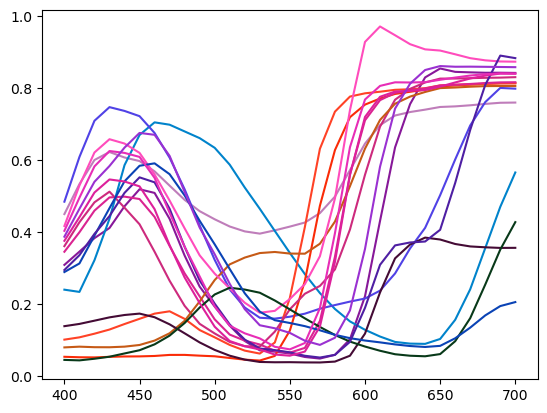

In [15]:
fountain_inks = {}
fig, axc = plt.subplots()
with open(f'Inks.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            spectra.plot(ax=axc)
            
            fountain_inks[name] = spectra
            
plt.show()

In [16]:
fountain_inks["Platinum violet"]

## inks127

In [17]:
!ls inks127

Cheshire cat.csv         Opportunity.csv          Robert oster.csv
Media beliar.csv         Pineider violet.csv      Think Pink.csv
North African violet.csv Purple jade rabbit.csv   Violet lion.csv


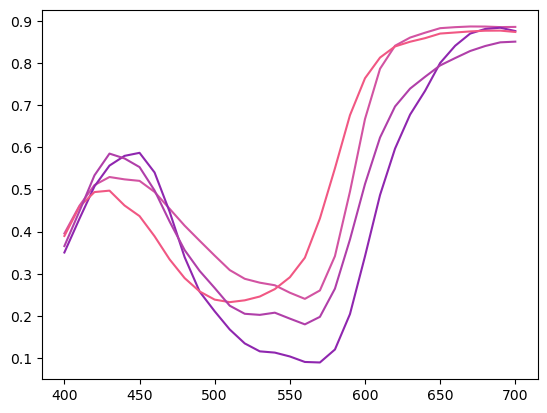

In [18]:
inks_127 = {}

for fn in ["Think Pink", "Opportunity", "Robert oster", "Cheshire cat"]:
    with open(f'inks127/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                inks_127[fn] = spectra
                spectra.plot()
            
plt.show()

In [19]:
inks_127["Platinum violet"] = fountain_inks["Platinum violet"]

In [20]:
for ink_name, purple in inks_127.items():
    gamut = InkGamut([cyan, magenta, yellow, fountain_inks["Peach haze D"], purple], paper)
    dist = gamut.get_width(tetrachromat, verbose=True, stepsize=0.05)
    print(ink_name, "has max dist", dist)

Generating Point Cloud:   7%|▌      | 292325/4084101 [00:02<00:38, 99382.70it/s]


KeyboardInterrupt: 

In [21]:
opportunity = InkGamut( [cyan, magenta, yellow, fountain_inks["Peach haze D"], inks_127["Opportunity"]], paper )
opportunity_pc, opportunity_perc = opportunity.get_refined_point_cloud(tetrachromat, 
                                             np.array([0, 0.05, 0.65, 0.05, 0.6]),
                                             np.array([0.25, 0, 0.05, 0.85, 0]))

exploring [0.   0.   0.55 0.   0.5 ] to [0.1  0.1  0.65 0.1  0.6 ] and [0.15 0.   0.   0.75 0.  ] to [0.25 0.1  0.1  0.85 0.1 ]


Generating Point Cloud: 100%|████████████| 7776/7776 [00:00<00:00, 92074.77it/s]


In [22]:
max_dist(bucket_points(opportunity_pc))

(0.026620299592053087, (1270, 14424))

In [23]:
thinkpink = InkGamut( [cyan, magenta, yellow, fountain_inks["Peach haze D"], inks_127["Think Pink"]], paper )
thinkpink_pc, thinkpink_perc = thinkpink.get_refined_point_cloud(tetrachromat, 
                                 np.array([0, 0.25, 0.75, 0.0, 0.7]),
                                 np.array([0.15, 0, 0.25, 0.85, 0]))

exploring [0.   0.15 0.65 0.   0.6 ] to [0.1  0.25 0.75 0.1  0.7 ] and [0.05 0.   0.15 0.75 0.  ] to [0.15 0.1  0.25 0.85 0.1 ]


Generating Point Cloud: 100%|████████████| 7776/7776 [00:00<00:00, 90304.23it/s]


In [24]:
max_dist(bucket_points(thinkpink_pc))

(0.026581992916068442, (1265, 14466))

In [25]:
opportunity.get_buckets(tetrachromat, refined=True)

Generating Point Cloud: 100%|████████| 161051/161051 [00:01<00:00, 97604.31it/s]


Point cloud generated.
exploring [0.  0.  0.4 0.  0.4] to [0.2 0.2 0.6 0.2 0.6] and [0.  0.  0.  0.6 0. ] to [0.2 0.2 0.2 0.8 0.2]


Generating Point Cloud: 100%|████████| 161051/161051 [00:01<00:00, 93773.21it/s]


[(0.025464085034806627,
  ((0.0, 0.14, 0.56, 0.04, 0.4800000000000001),
   (0.2, 0.06, 0.08, 0.7000000000000001, 0.0))),
 (0.025381506088441808,
  ((0.0, 0.2, 0.54, 0.02, 0.4000000000000001),
   (0.2, 0.0, 0.06, 0.7000000000000001, 0.0))),
 (0.02525466427275258,
  ((0.0, 0.14, 0.54, 0.02, 0.52),
   (0.2, 0.04, 0.04, 0.7200000000000001, 0.04))),
 (0.025204587846316073,
  ((0.0, 0.14, 0.5000000000000001, 0.02, 0.5000000000000001),
   (0.2, 0.08, 0.0, 0.7000000000000001, 0.0))),
 (0.02515395767825168,
  ((0.0, 0.2, 0.56, 0.0, 0.54), (0.2, 0.02, 0.04, 0.7400000000000001, 0.1))),
 (0.025103206876044892,
  ((0.0, 0.1, 0.54, 0.06, 0.5000000000000001),
   (0.2, 0.0, 0.06, 0.7200000000000001, 0.04))),
 (0.02506270851206538,
  ((0.0, 0.18, 0.54, 0.02, 0.44000000000000006),
   (0.2, 0.0, 0.04, 0.7200000000000001, 0.02))),
 (0.02493705372815136,
  ((0.0, 0.1, 0.5800000000000001, 0.0, 0.5000000000000001),
   (0.2, 0.02, 0.06, 0.7200000000000001, 0.0))),
 (0.024876049691380353,
  ((0.0, 0.14, 0.52, 

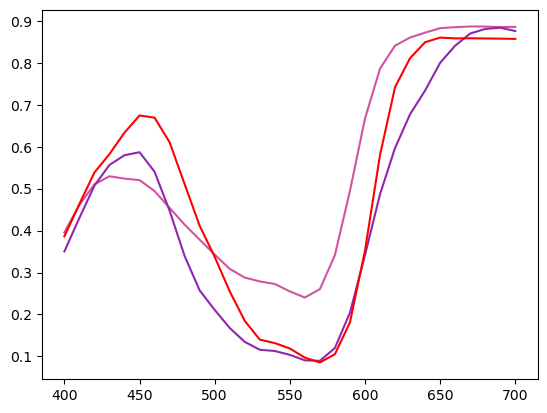

In [68]:
inks_127["Think Pink"].plot()
inks_127["Opportunity"].plot()
inks_127["Platinum violet"].plot(color="red")

## Cellular Neug. Helpers

In [10]:
def cell_neug_guide(target, width=0.5):
    # target is a point in ink space
    # e.g. (0.3, 0.4, 0.6) representing a point in CMY space
    num_inks = len(target)
    p = np.array(target)
    p0 = np.maximum(0, p - width / 2)
    p1 = p0 + width / 2
    p0 -= np.maximum(0, p1 - 1)

    p0 = np.round(100 * p0).astype(int)
    
    print("\033[1m", "Printing reference:", "\033[0m")

    print("index", "\t", "print:", "\t", "save as:")
    for i in range(2 ** num_inks):
        binary_str = format(i, f"0{num_inks}b")
        vertex = 50 * np.array( list(map(int, binary_str ) ))
        formatted_arr = "[" + ", ".join(f"{num:3d}" for num in vertex+p0) + "]"
        print(i, "\t", formatted_arr, "\t", binary_str)
    
    print(f"Transform percentages from this cell's pointcloud to real coordinates via x -> x/2 + {list(p0/100)}.")
        
        
cell_neug_guide((0.3, 0.4, 0.6), width=0.4)

 Printing reference: 
index 	 print: 	 save as:
0 	 [ 10,  20,  40] 	 000
1 	 [ 10,  20,  90] 	 001
2 	 [ 10,  70,  40] 	 010
3 	 [ 10,  70,  90] 	 011
4 	 [ 60,  20,  40] 	 100
5 	 [ 60,  20,  90] 	 101
6 	 [ 60,  70,  40] 	 110
7 	 [ 60,  70,  90] 	 111
Transform percentages from this cell's pointcloud to real coordinates via x -> x/2 + [0.1, 0.2, 0.4].


## Real shit

In [19]:
CMYPOO = {}
with open(f'PeachHaze,Opportunity,OOO.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            
            CMYPOO[name] = spectra

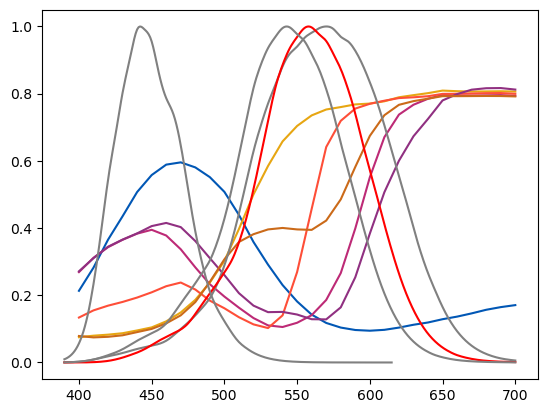

In [20]:
CMYPOO["100000"].plot()
CMYPOO["010000"].plot()
CMYPOO["001000"].plot()
CMYPOO["000100"].plot()
CMYPOO["000010"].plot()
CMYPOO["000001"].plot()
Cone.l_cone().plot(color='grey')
Cone.q_cone().plot(color='red')
Cone.m_cone().plot(color='grey')
Cone.s_cone().plot(color='grey')

In [10]:
cmypoo_neugebauer = Neugebauer(CMYPOO)

In [11]:
cmypoo_gamut = InkGamut(cmypoo_neugebauer, paper)

In [12]:
cmypoo_gamut.get_width(tetrachromat)

Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:22<00:00, 77083.77it/s]


Point cloud generated.
maximum distance is 1.6264579671687596e-06 with percentages (0.0, 0.0, 1.0, 1.0, 0.7000000000000001, 1.0) and (0.0, 0.0, 0.8, 1.0, 0.7000000000000001, 1.0)


1.6264579671687596e-06

In [41]:
cmypoo_pc, cmypoo_perc = cmypoo_gamut.get_refined_point_cloud(tetrachromat, 
                                 np.array([0, 0.1, 0.5, 0, 0.6, 0.9]),
                                 np.array([0.2, 0, 0.6, 1, 0, 0.4]),
                                    stepsize=0.2)

exploring [0.  0.  0.3 0.  0.4 0.7] to [0.2 0.2 0.5 0.2 0.6 0.9] and [0.  0.  0.4 0.8 0.  0.2] to [0.2 0.2 0.6 1.  0.2 0.4]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:24<00:00, 73345.09it/s]


In [1]:
max_dist(bucket_points(cmypoo_pc))

NameError: name 'max_dist' is not defined

In [38]:
cmypoo_perc[98580]

array([0.  , 0.12, 0.46, 0.  , 0.54, 0.88])

In [39]:
cmypoo_perc[3393808]

array([0.2 , 0.  , 0.56, 0.98, 0.  , 0.2 ])

In [46]:
len(cmypoo_pc)

3543122

In [ ]:
bucket_points(cmypoo_pc)

In [13]:
cmypoo_buckets = cmypoo_gamut.get_buckets(tetrachromat, refined=5)

Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:22<00:00, 78016.20it/s]


Point cloud generated.
exploring [0.  0.  0.3 0.  0.4 0.7] to [0.2 0.2 0.5 0.2 0.6 0.9] and [0.  0.  0.4 0.8 0.  0.2] to [0.2 0.2 0.6 1.  0.2 0.4]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:24<00:00, 72710.58it/s]


exploring [0.  0.  0.4 0.  0.5 0.8] to [0.2 0.2 0.6 0.2 0.7 1. ] and [0.  0.  0.5 0.8 0.  0.3] to [0.2 0.2 0.7 1.  0.2 0.5]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:23<00:00, 73961.39it/s]


exploring [0.  0.  0.  0.  0.3 0.8] to [0.2 0.2 0.2 0.2 0.5 1. ] and [0.  0.  0.4 0.7 0.  0. ] to [0.2 0.2 0.6 0.9 0.2 0.2]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:24<00:00, 71069.51it/s]


exploring [0.  0.  0.4 0.  0.4 0.7] to [0.2 0.2 0.6 0.2 0.6 0.9] and [0.  0.  0.6 0.7 0.  0. ] to [0.2 0.2 0.8 0.9 0.2 0.2]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:23<00:00, 73863.43it/s]


exploring [0.  0.  0.8 0.  0.4 0. ] to [0.2 0.2 1.  0.2 0.6 0.2] and [0.  0.  0.5 0.7 0.  0. ] to [0.2 0.2 0.7 0.9 0.2 0.2]


Generating Point Cloud: 100%|███████████████████████████████████████████████████████████████████████████████████| 1771561/1771561 [00:24<00:00, 73776.68it/s]


In [14]:
cmypoo_buckets.reverse()

In [18]:
for _, (p1, p2) in cmypoo_buckets[:5]:
    print(([int(100*a) for a in p1]),end='\t')
    print(([int(100*a) for a in p2]))

[0, 10, 46, 0, 48, 77]	[20, 0, 68, 89, 0, 0]
[0, 18, 8, 0, 36, 86]	[18, 0, 50, 87, 0, 0]
[0, 12, 44, 0, 50, 84]	[20, 6, 78, 87, 0, 0]
[0, 4, 58, 0, 50, 84]	[20, 2, 80, 86, 0, 2]
[0, 10, 42, 0, 46, 86]	[20, 0, 74, 89, 0, 2]


NameError: name 'fountain_inks' is not defined

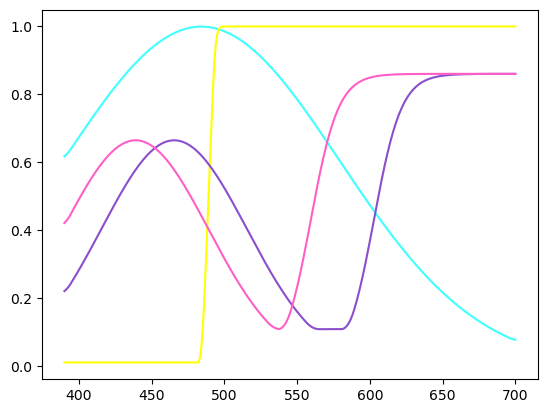

In [56]:
new_pigments = []

fig, ax3 = plt.subplots()
for pigment in np.load("new_pigments.npy"):
    spectra = Spectra(data=np.clip(pigment, 0.01, 1), wavelengths=wavelengths1)
    spectra.plot(ax=ax3)
    new_pigments.append(spectra.interpolate_values(wavelengths10))
    
new_nb = load_neugebauer(new_pigments+[fountain_inks["Operation overlord orange N"]] + [magenta], paper)
new_gamut = InkGamut(new_nb)

In [118]:
new_gamut.get_width(tetrachromat)

Generating Point Cloud: 100%|███████████████| 1771561/1771561 [00:20<00:00, 85556.85it/s]


Point cloud generated.
maximum distance is 0.041394445284640646 with percentages (0.0, 0.4, 1.0, 0.0, 0.0, 0.0) and (0.6000000000000001, 0.30000000000000004, 0.0, 0.8, 0.0, 0.2)


0.041394445284640646

In [39]:
cmypoo_buckets[:10]

[(0.027991365598729334,
  ((0.0, 0.1, 0.5, 0.0, 0.6000000000000001, 0.9),
   (0.2, 0.0, 0.6000000000000001, 1.0, 0.0, 0.4))),
 (0.027476290589286745,
  ((0.0, 0.1, 0.6000000000000001, 0.0, 0.7000000000000001, 1.0),
   (0.2, 0.1, 0.7000000000000001, 1.0, 0.0, 0.5))),
 (0.02716121038697411,
  ((0.0, 0.0, 0.1, 0.0, 0.5, 1.0),
   (0.2, 0.0, 0.6000000000000001, 0.9, 0.0, 0.0))),
 (0.02698322453579971,
  ((0.0, 0.0, 0.6000000000000001, 0.0, 0.6000000000000001, 0.9),
   (0.2, 0.1, 0.8, 0.9, 0.0, 0.0))),
 (0.026912993054363343,
  ((0.0, 0.1, 1.0, 0.0, 0.6000000000000001, 0.2),
   (0.2, 0.0, 0.7000000000000001, 0.9, 0.0, 0.2))),
 (0.02682387240249745,
  ((0.0, 0.1, 0.4, 0.0, 0.6000000000000001, 0.9),
   (0.2, 0.1, 0.6000000000000001, 1.0, 0.0, 0.0))),
 (0.026648182320326896,
  ((0.0, 0.1, 0.8, 0.0, 0.7000000000000001, 0.5),
   (0.2, 0.1, 0.5, 1.0, 0.0, 0.2))),
 (0.026412889481868707,
  ((0.0, 0.30000000000000004, 0.8, 0.0, 0.30000000000000004, 0.9),
   (0.2, 0.0, 1.0, 1.0, 0.0, 0.0))),
 (0.0263

0.028 [0.65491037 0.21920855 0.10778214]
0.027 [0.63632624 0.19514571 0.09260225]
0.027 [0.66888204 0.26256165 0.1298973 ]
0.027 [0.66011579 0.23431832 0.09599402]
0.027 [0.668683   0.245392   0.09624961]
0.027 [0.65260206 0.22110714 0.11869708]
0.027 [0.6393636  0.21064766 0.11133832]
0.026 [0.72212682 0.23572799 0.07360707]
0.026 [0.62157802 0.22253746 0.23325708]
0.026 [0.66264194 0.23176711 0.08595886]


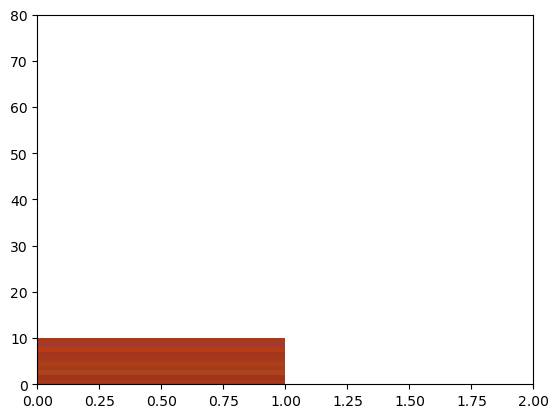

In [38]:
fig, ax = plt.subplots()

ax.set_xlim([0, 2])
ax.set_ylim([0, 80])

for i, (dst, (t, _)) in enumerate(cmypoo_buckets[:10]):
    a = Spectra(data=cmypoo_neugebauer.mix(np.array(t)).T,wavelengths=wavelengths10)
    print(round(dst,3), a.to_rgb())
    rect =  plt.Rectangle((0, i), 1, 1, linewidth=1, edgecolor='none', facecolor=a.to_rgb().T)
    ax.add_patch(rect)
    
plt.show()

In reality this looks pretty orangish.

In [42]:
met1 = Spectra(data=cmypoo_neugebauer.mix(cmypoo_perc[98580]).T, wavelengths=wavelengths10)
met2 = Spectra(data=cmypoo_neugebauer.mix(cmypoo_perc[3393808]).T, wavelengths=wavelengths10)

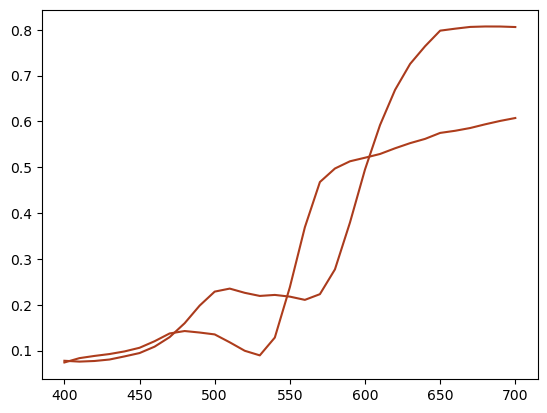

In [43]:
met1.plot()
met2.plot()

In [45]:
mets = []
with open(f'ConfusionColors.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            mets.append(spectra)

In [17]:
met2.plot(color='blue')
met1.plot(color='blue')
Cone.m_cone().plot()

NameError: name 'met2' is not defined

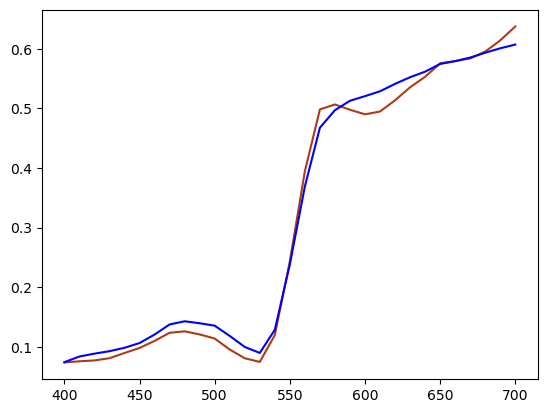

In [86]:
mets[0].plot()
# mets[1].plot()
# met1.plot(color='blue')
met2.plot(color='blue')
# Cone.s_cone().plot(color='grey')
# Cone.m_cone().plot(color='grey')
# Cone.q_cone().plot(color='red')
# Cone.l_cone().plot(color='grey')
# plt.savefig("expected-vs-actual-metamers")

In [102]:
tetrachromat.wavelengths.shape

(311,)

In [99]:
met2.wavelengths().shape

(31,)

In [92]:
print(tetrachromat.observe(mets[0]))
print(tetrachromat.observe(met2))

[0.0980423  0.25953262 0.32209291 0.34852075]
[0.10948076 0.26449849 0.32605886 0.35496617]


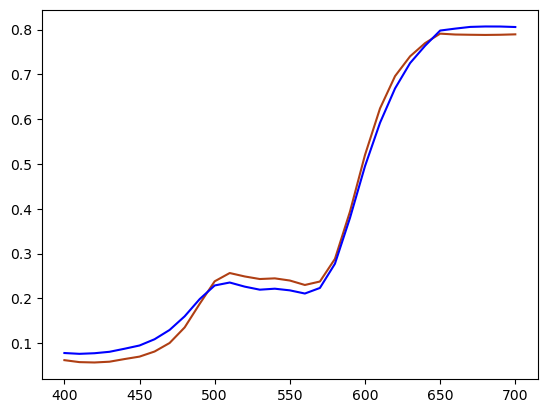

In [87]:
mets[1].plot()
met1.plot(color='blue')
# Cone.s_cone().plot(color='grey')
# Cone.m_cone().plot(color='grey')
# Cone.q_cone().plot(color='red')
# Cone.l_cone().plot(color='grey')
# plt.savefig("expected-vs-actual-metamers")

In [93]:
print(tetrachromat.observe(mets[1]))

[0.08612851 0.27051228 0.31425337 0.36207647]


In [94]:
print(tetrachromat.observe(met1))

[0.10806918 0.25557611 0.29771963 0.34561519]


Theoretical difference of metamers:

In [95]:
print(tetrachromat.observe(met1) - tetrachromat.observe(met2))

[-0.00141158 -0.00892238 -0.02833923 -0.00935098]


Actual difference of metamers:

In [96]:
print(tetrachromat.observe(mets[0]) - tetrachromat.observe(mets[1]))

[ 0.01191379 -0.01097966  0.00783953 -0.01355572]


In [58]:
print(tetrachromat.observe(met1) -tetrachromat.observe(met2))

[-0.00141158 -0.00892238 -0.02833923 -0.00935098]


In [76]:
print(tetrachromat.observe(mets[0]) -tetrachromat.observe(met1))

[-0.01002688  0.00395651  0.02437328  0.00290556]


In [77]:
print(tetrachromat.observe(mets[1]) -tetrachromat.observe(met2))

[-0.02335225  0.00601379 -0.01180549  0.00711031]


In [13]:
metamers_122423 = {}
with open(f'122423.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            
            metamers_122423[name] = spectra

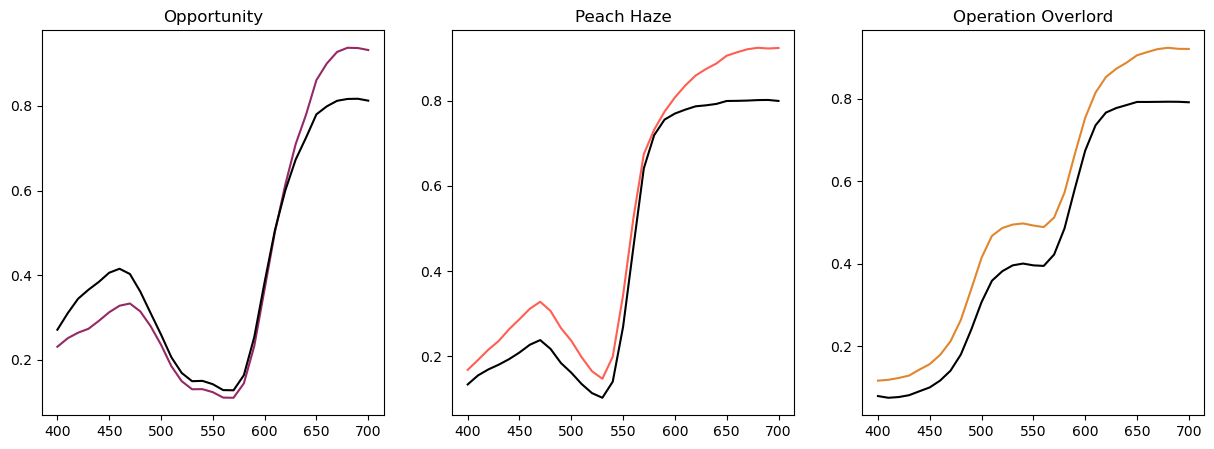

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
metamers_122423["Opportunity"].plot(ax=axs[0])
CMYPOO["000010"].plot(color='black',ax=axs[0])
axs[0].set_title("Opportunity")
metamers_122423["PeachHaze"].plot(ax=axs[1])
CMYPOO["000100"].plot(color='black',ax=axs[1])
axs[1].set_title("Peach Haze")
metamers_122423["OperationOverlord"].plot(ax=axs[2])
CMYPOO["000001"].plot(color='black',ax=axs[2])
axs[2].set_title("Operation Overlord")
plt.show()

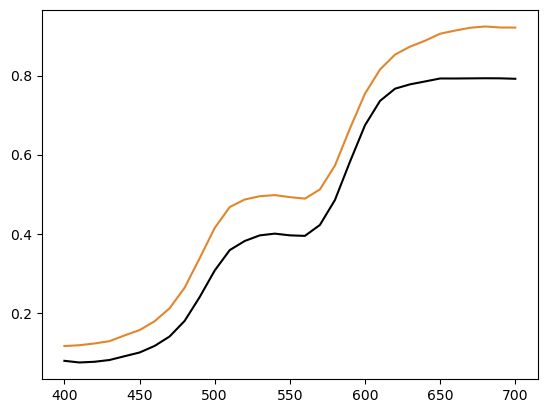

In [15]:
tetrachromat.observe(metamers_122423["00 10 46 00 48 77"])

array([0.14536089, 0.35436705, 0.39976806, 0.44961016])

In [16]:
tetrachromat.observe(metamers_122423["20 00 68 89 00 00"])

array([0.14359168, 0.31932729, 0.37794416, 0.40376624])

In [46]:
tetrachromat.observe(metamers_122423["00 18 08 00 36 86"])

array([0.16551391, 0.36396325, 0.40719658, 0.45271281])

In [47]:
tetrachromat.observe(metamers_122423["18 00 50 87 00 00"])

array([0.18499196, 0.33911707, 0.39802613, 0.4255518 ])

## Glossy

In [8]:
glossy_inks_122423 = {}
with open(f'122623.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            if row[2] != "Glossy":
                continue
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            
            glossy_inks_122423[name] = spectra

In [9]:
glossy_inks_122423

{'Paper': <spectra.Spectra at 0x107abea10>,
 'Peach haze ': <spectra.Spectra at 0x11b5f8f50>,
 'Opportunity': <spectra.Spectra at 0x13d353990>,
 'Operation Overlord': <spectra.Spectra at 0x13d93c210>}

In [10]:
glossy_paper = glossy_inks_122423["Paper"]

In [14]:
import colour
colour_d50 = colour.SDS_ILLUMINANTS.get('D50')
d50 = Spectra(data=colour_d50.values / 103.003, wavelengths=colour_d50.wavelengths)

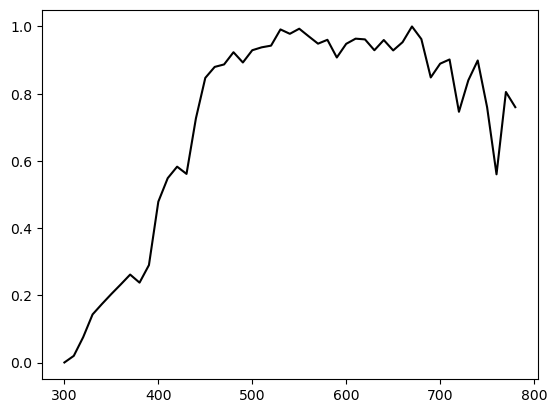

In [22]:
d50.plot(color='black')

In [23]:
glossy_approx_gamut = InkGamut(inks=[
    glossy_inks_122423["Peach haze "],
    glossy_inks_122423["Opportunity"],
    glossy_inks_122423["Operation Overlord"],
], paper=glossy_paper, whitepoint=d50)

In [24]:
glossy_approx_gamut.get_width(tetrachromat)

Generating Point Cloud:   0%|                                                                                                       | 0/1331 [00:00<?, ?it/s]


TypeError: unsupported operand type(s) for /: 'float' and 'Spectra'